In [2]:
include("../src/linear_regression.jl")
using Plots
using Printf

In [3]:
# data
xs = [i for i in (-10:10)]
ys = [x^3 - x^2 + x + 100*rand() for x in xs]
print("data defind")

data defind

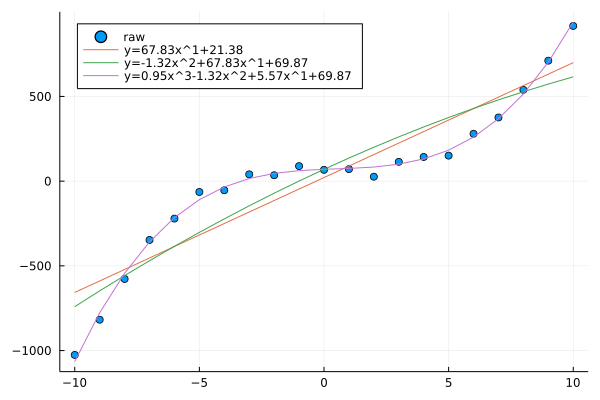

In [4]:
makeXmat(d) = [x^j for x in xs, j in (0:d)]
function expstr(w)
    exp = "y="
    for j in (length(w):(-1):1)
        if j != length(w); exp *= w[j]>=0 ? "+" : ""; end
        exp *= @sprintf "%.2f%s" w[j] (j>1 ? "x^$(j-1)" : "")
    end
    return exp
end

plt = scatter(xs,ys,lab="raw",legend=:topleft)
# 1~3次式でフィッティング
for i in (1:3)
    X = makeXmat(i)
    w = linear_regression(X,ys)
    plot!(plt,xs,X*w,lab=expstr(w))
end
plt